# Examen del 2do Parcial

1. Utilizando el dataset de _Coactivation_matrix.mat_:
- Calcule el coeficiente de mundo pequeño
- Calcule las comunidades del grafo
- Calcule los hub
- Calcule la eficiencia global
- Calcule la eficiencia local
- Determine el grado de cada nodo

2. Utilizando el dataset de _Coactivation_matrix.mat_:
- Generar el mapa de calor de cada matriz de conectividad
- Generar la distribución de datos de cada matriz de conectividad
- ¿Qué valor se encuentra en el percentil 0.25, 0.5 y 0.75 de la matriz de conectividad?
- Cree los 3 grafos 2D filtrando la matriz de conectividad con los valores dados por los percentiles del ejercicio anterior

3. Utilizando el dataset de _Coactivation_matrix.mat_:
- Genere el grafo 3D
- Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
- Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot

4. Utilizando el dataset de _chb01_01.edf_:
- Calcule el coeficiente de mundo pequeño
- Calcule las comunidades del grafo
- Calcule los hub
- Calcule la eficiencia global
- Calcule la eficiencia local
- Determine el grado de cada nodo

5. Utilizando el dataset de _chb01_01.edf_:
- Genere el grafo 3D
- Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
- Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot


In [2]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sp
from scipy.io import loadmat
import mne

# 1 

In [3]:
#Coeficientes de mundo pequeño
path= r"C:\Users\monce\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\BCT\Coactivation_matrix.mat"
data= loadmat(path)
matriz=np.array(data["Coactivation_matrix"])
#binarizar
umbral = 0.04
mat_thr = np.where(matriz > umbral, matriz, 0)
G = nx.from_numpy_array(mat_thr)
#Crear un grafo random.
random=nx.gnm_random_graph(G.number_of_nodes(),G.number_of_edges())

cr=nx.average_clustering(random)
cg=nx.average_clustering(G)

lr=nx.average_shortest_path_length(random)
lg=nx.average_shortest_path_length(G)

sigma= (cg/cr)/(lg/lr)
print(f"el coeficiente de mundo peuqeño {sigma}")

el coeficiente de mundo peuqeño 4.847620055155511


In [13]:
#Encontrar comunidades 
import networkx.algorithms.community as nx_comm
x_comm.louvain_communities( G= G, weight= 'weight',resolution = 1)
len(comunidades)
print(f"las comunidades detectadas son {len(comunidades)}")

las comunidades detectadas son 6


In [58]:
#Hubs
grados = dict(G.degree())
ordenado=sorted(grados.items(), key=lambda x:x[1], reverse=True)
# print(list(ordenado[:5]))

In [38]:
#Eficiencia global y local
EG=nx.global_efficiency(G)
EL=nx.local_efficiency(G)
print(f"Las eficiencia global es {EG} y la eficiencia local es {EL}")
#Grado de cada nodo
grados = dict(G.degree())
grados

Las eficiencia global es 0.42644235895519617 y la eficiencia local es 0.6525923352818676


# 2

¿Qué valor se encuentra en el percentil 0.25, 0.5 y 0.75 de la matriz de conectividad?
Cree los 3 grafos 2D filtrando la matriz de conectividad con los valores dados por los percentiles del ejercicio anterior

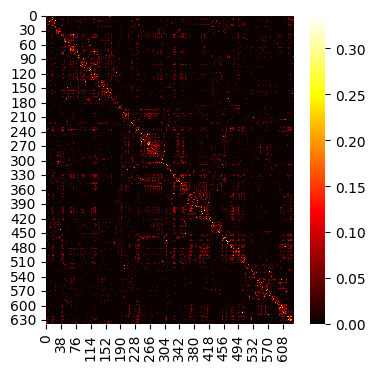

In [44]:
df = pd.DataFrame(matriz)
plt.figure(figsize=(4,4))
ax= sns.heatmap(df.values,
                annot= False, cmap ="hot", fmt=".2f")
plt.show()

(array([3.70742e+05, 2.71580e+04, 5.71400e+03, 1.57400e+03, 8.16000e+02,
        4.98000e+02, 2.94000e+02, 1.60000e+02, 5.20000e+01, 3.40000e+01,
        2.00000e+00]),
 array([0.        , 0.03050239, 0.06100478, 0.09150718, 0.12200957,
        0.15251196, 0.18301435, 0.21351675, 0.24401914, 0.27452153,
        0.30502392, 0.33552632]),
 <BarContainer object of 11 artists>)

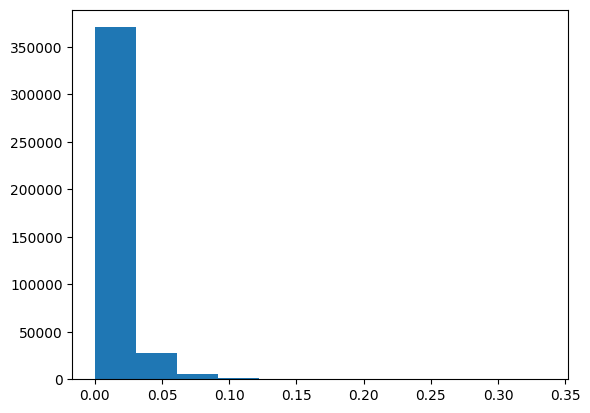

In [52]:
#distribución de datos
df_a=np.ravel(df)
plt.hist(df_a, bins=30)

In [76]:
solo_grados = [grado for _, grado in G.degree()]
p25, p50, p75 = np.percentile(solo_grados, [25, 50, 75])
print(f"Penrcentil o.25 :{p25}, percentil 0.50:{p50}, percentil 0.75: {p75}")

Penrcentil o.25 :18.0, percentil 0.50:30.0, percentil 0.75: 55.0


In [ ]:
grados= list(G.degree())
p25_g=[]
p50_g=[]
p75_g=[]   
for nodo,grado in grados:
   if grado<18:
    p25_g.append(nodo)
   elif grado<30:
    p50_g.append(nodo)
   elif grado<55:
        p75_g.append(nodo)

In [ ]:
G_p25 = G.subgraph(p25_g).copy()
nx.draw_networkx(G_p25)  

In [ ]:
G_p50 = G.subgraph(p50_g).copy()
nx.draw_networkx(G_p50)

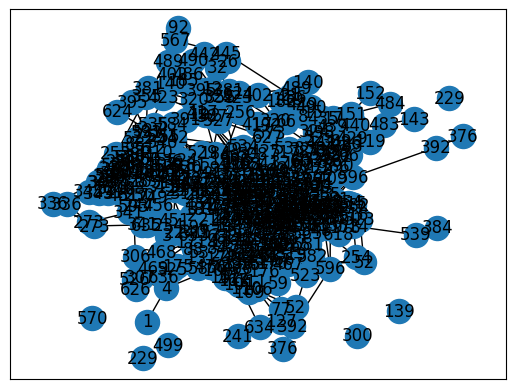

In [ ]:
G_p75 = G.subgraph(p75_g).copy()

nx.draw_networkx(G_p50) 

# 3

In [4]:
data.keys()
coord=np.array(data["Coord"])
coord_m=pd.DataFrame(coord)
m=pd.DataFrame(matriz)

GG = nx.from_pandas_adjacency(m, create_using=nx.DiGraph());
import matplotlib.colors as colors
import matplotlib.pyplot as plt

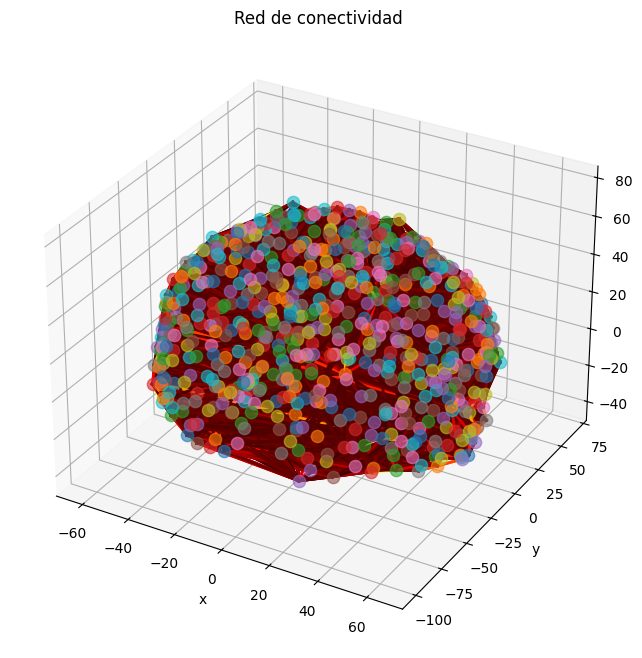

In [11]:
#Grafo 3d
GG = nx.from_pandas_adjacency(m, create_using=nx.DiGraph());
norm = colors.Normalize(vmin=m.min().min(), vmax=m.max().max())
cmap = plt.get_cmap('hot')
pos3D = {nodo: (row[0], row[1], row[2]) for nodo, row in coord_m.iterrows()}
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d') #el 111 indica la malla de subplots que va a crear, una de 111 solo será un subplot
for nodo,(x,y,z) in pos3D.items():
    size=grados[nodo]*factor
    ax.scatter(x,y,z, s=GG.degree[i])

for i,j, data in GG.edges(data=True):
    x = [pos3D[i][0], pos3D[j][0]]
    y = [pos3D[i][1], pos3D[j][1]]
    z = [pos3D[i][2], pos3D[j][2]]
    valor = m.loc[i, j]  
    color = cmap(norm(valor))
    ax.plot(x,y,z,c=color, linewidth=2)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Red de conectividad')
plt.show()

# 3


In [172]:
path= r"C:\Users\monce\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\EEG_practica\chb01_01.edf"
data= mne.io.read_raw_edf(path) 
d=data.get_data()
#print(data.info) ##23 canales, 921600 puntos en el tiempo, sfreq: 256.0 Hz (1 hora de EEG)
print(type(d))
print(d.shape)

Extracting EDF parameters from C:\Users\monce\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\EEG_practica\chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\monce\AppData\Local\Temp\ipykernel_25924\1203589025.py:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data= mne.io.read_raw_edf(path)


<class 'numpy.ndarray'>
(23, 921600)


In [192]:
##Construir la matriz de conectividad, usaré una ventana de tiempo para reducir
## el número de datos
fs = 256
win = 60 * fs  # 1 minuto = 15360 muestras
n_win = d.shape[1] // win
corr_total = np.zeros((d.shape[0], d.shape[0]))
for i in range(n_win):
    seg = d[:, i*win:(i+1)*win]
    corr_total += np.corrcoef(seg)
corr_matrix = corr_total / n_win
corr_matrix.max

<function ndarray.max>

In [201]:
#Coeficiente de mundo pequeño
#binarizar
umbral = 0.06
mat_thr = np.where(corr_matrix > umbral, corr_matrix, 0)
G = nx.from_numpy_array(mat_thr)
#nx.is_connected(G)
#Crear un grafo random.
random=nx.gnm_random_graph(G.number_of_nodes(),G.number_of_edges())
#nx.is_connected(random)
cr=nx.average_clustering(random)
cg=nx.average_clustering(G)

lr=nx.average_shortest_path_length(random)
lg=nx.average_shortest_path_length(G)

sigma= (cg/cr)/(lg/lr)
print(f"el coeficiente de mundo peuqeño {sigma}")

el coeficiente de mundo peuqeño 0.942888157386575


In [204]:
#Encontrar comunidades 
import networkx.algorithms.community as nx_comm
nx_comm.louvain_communities( G= G, weight= 'weight',resolution = 1)
len(comunidades)
print(f"las comunidades detectadas son {len(comunidades)}")

las comunidades detectadas son 6


In [207]:
#Hubs
grados = dict(G.degree())
ordenado=sorted(grados.items(), key=lambda x:x[1], reverse=True)
print(list(ordenado[:5]))

[(10, 22), (6, 21), (9, 21), (16, 21), (5, 20)]


In [209]:
#Eficiencia global y local
EG=nx.global_efficiency(G)
EL=nx.local_efficiency(G)
print(f"Las eficiencia global es {EG} y la eficiencia local es {EL}")
#Grado de cada nodo
grados = dict(G.degree())

Las eficiencia global es 0.8227931488801051 y la eficiencia local es 0.9112829987947769


In [250]:
data= mne.io.read_raw_edf(path) 
#print(data.get_montage()) ## no hay coordenadas, por lo que usaremos default
df=mne.channels.make_standard_montage('standard_1020')
canales=data.ch_names
c=pd.DataFrame(df.get_positions()["ch_pos"])
coord=c.transpose()
m=pd.DataFrame(d)
grados=(G.degree())

Extracting EDF parameters from C:\Users\monce\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\EEG_practica\chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\monce\AppData\Local\Temp\ipykernel_25924\2032555858.py:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data= mne.io.read_raw_edf(path)


In [10]:
#Grafo 3d
GG = nx.from_pandas_adjacency(m, create_using=nx.DiGraph());
norm = colors.Normalize(vmin=m.min().min(), vmax=m.max().max())
cmap = plt.get_cmap('hot')

pos3D = pos3D = {i: tuple(coord.iloc[i]) for i in range(23)}
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d') #el 111 indica la malla de subplots que va a crear, una de 111 solo será un subplot
for nodo,(x,y,z) in pos3D.items():
    size=grados[nodo]*factor
    ax.scatter(x,y,z, s= GG.degree[i])

for i,j, data in GG.edges(data=True):
    x = [pos3D[i][0], pos3D[j][0]]
    y = [pos3D[i][1], pos3D[j][1]]
    z = [pos3D[i][2], pos3D[j][2]]
    valor = m.loc[i, j]  
    color = cmap(norm(valor))
    ax.plot(x,y,z, ax.plot(x, y, z, c=color, linewidth=2))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Red de conectividad')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'